Mounting the drive

In [1]:
!cp '/content/drive/MyDrive/Deep Learning/rsna-pneumonia-detection-challenge.zip' 'rsna-pneumonia-detection-challenge.zip'

listing out the files in the drive

In [2]:
ls

drive/  rsna-pneumonia-detection-challenge.zip  sample_data/


Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Unziping the folder

In [4]:
!unzip rsna-pneumonia-detection-challenge.zip

Streaming output truncated to the last 5000 lines.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_trai

In [5]:
ls

drive/                                  stage_2_sample_submission.csv
rsna-pneumonia-detection-challenge.zip  stage_2_test_images/
sample_data/                            stage_2_train_images/
stage_2_detailed_class_info.csv         stage_2_train_labels.csv


Getting the datasets

In [6]:
train=pd.read_csv('stage_2_train_labels.csv')
detail=pd.read_csv('stage_2_detailed_class_info.csv')

# **Getting Basic info on Train Dataset**

Displaying First five rows of train

In [7]:
train.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [9]:
#shape
train.shape

(30227, 6)

Checking for null values

In [10]:
train.isna().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

# **Getting Basic info on Detail Dataset**

Displaying First five rows of detail

In [11]:
detail.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [12]:
detail.shape

(30227, 2)

In [13]:
#deleting the duplicates in detail dataset if any
detail = detail.drop_duplicates('patientId').reset_index(drop=True)
print(detail.shape)

(26684, 2)


## **Meging the both dataset**

In [14]:
data=train.merge(detail, how='inner', on='patientId')

# **Performing Various Preprocessing and EDA on Data**

In [15]:
data.head()#diplaying 5 rows

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [16]:
#checking for null values
data.isna().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [17]:
data[data['Target']==0]

patientId   x   y  width  height  Target  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6 NaN NaN    NaN     NaN       0   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd NaN NaN    NaN     NaN       0   
2      00322d4d-1c29-4943-afc9-b6754be640eb NaN NaN    NaN     NaN       0   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5 NaN NaN    NaN     NaN       0   
6      00569f44-917d-4c86-a842-81832af98c30 NaN NaN    NaN     NaN       0   
...                                     ...  ..  ..    ...     ...     ...   
30216  c1cf3255-d734-4980-bfe0-967902ad7ed9 NaN NaN    NaN     NaN       0   
30217  c1e228e4-b7b4-432b-a735-36c48fdb806f NaN NaN    NaN     NaN       0   
30218  c1e3eb82-c55a-471f-a57f-fe1a823469da NaN NaN    NaN     NaN       0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba NaN NaN    NaN     NaN       0   
30224  c1f6b555-2eb1-4231-98f6-50a963976431 NaN NaN    NaN     NaN       0   

                              class  
0      No Lung Opacity / Not Normal  
1      No Lung Opacity / Not Normal  
2      No Lung Opacity / Not Normal  
3                            Normal  
6      No Lung Opacity / Not Normal  
...                             ...  
30216                        Normal  
30217  No Lung Opacity / Not Normal  
30218                        Normal  
30223                        Normal  
30224                        Normal  

[20672 rows x 7 columns]

Analysing above step we understood that when x,y,width,height columns are 0, it means that there is no pneumonia. Thus null values in x, y, width, height can be replaced with 0.

In [18]:
#replacing null values
data.fillna(0, inplace=True)
data.isna().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64

In [19]:
print(data['Target'].value_counts())
print(data['Target'].value_counts(normalize=True))

0    20672
1     9555
Name: Target, dtype: int64
0    0.683892
1    0.316108
Name: Target, dtype: float64


In [20]:
#data['Target'].plot.bar()

In [21]:
data.groupby('class').size()

class
Lung Opacity                     9555
No Lung Opacity / Not Normal    11821
Normal                           8851
dtype: int64

<Axes: ylabel='class'>

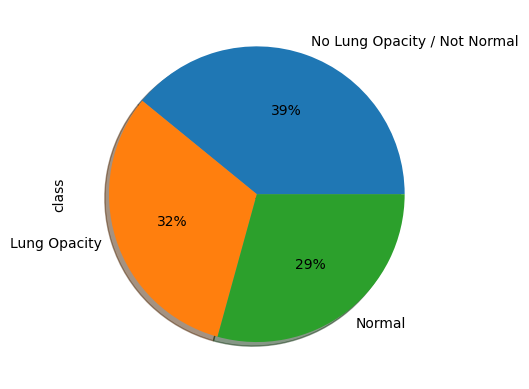

In [22]:
data["class"].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True, subplots=False)

<Axes: xlabel='class', ylabel='count'>

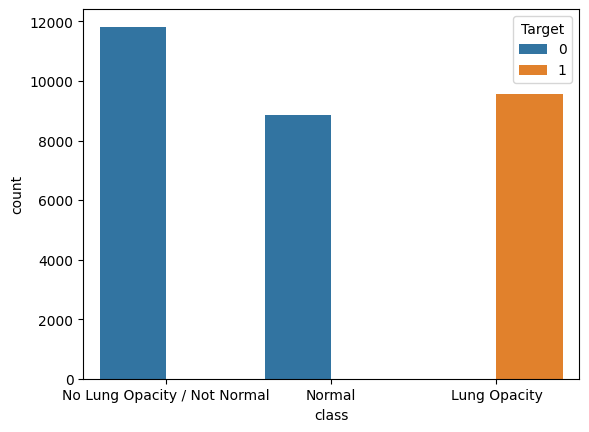

In [23]:
sns.countplot(x = 'class', hue = 'Target', data = data)

The above plot shows that the patients with pneumonia has class Lung opacity

# **EDA**

**Getting the train images using pydicom**

In [24]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.3 MB/s eta 0:00:00


In [25]:
import pydicom
patientId = data['patientId'][0]
dcm_file ="/content/stage_2_train_images/%s.dcm"% patientId
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [26]:
dicom_df=data
dicom_df.shape

(30227, 7)

In [27]:
from tqdm import tqdm
def process_dicom_data(data_df):
    for n, pid in tqdm(enumerate(data_df['patientId'].unique())):        
        dcm_file = "/content/stage_2_train_images/%s.dcm" % pid
        dcm_data = pydicom.read_file(dcm_file)        
        idx = (data_df['patientId']==dcm_data.PatientID)
        data_df.loc[idx,'Modality'] = dcm_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = dcm_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = dcm_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = dcm_data.ViewPosition
        
    return data_df

In [28]:
dicom_df = process_dicom_data(dicom_df)

26684it [02:03, 215.33it/s]


In [29]:
dicom_df = dicom_df.astype({"PatientAge": int})
dicom_df.fillna(0.0, inplace=True)
dicom_df.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class Modality  PatientAge PatientSex  \
0  No Lung Opacity / Not Normal       CR          51          F   
1  No Lung Opacity / Not Normal       CR          48          F   
2  No Lung Opacity / Not Normal       CR          19          M   
3                        Normal       CR          28          M   
4                  Lung Opacity       CR          32          F   

  BodyPartExamined ViewPosition  
0            CHEST           PA  
1            CHEST           PA  
2            CHEST           AP  
3            CHEST           PA  
4            CHEST           AP

In [30]:
dicom_df.nunique()

patientId           26684
x                     749
y                     727
width                 352
height                726
Target                  2
class                   3
Modality                1
PatientAge             97
PatientSex              2
BodyPartExamined        1
ViewPosition            2
dtype: int64

**Visualization of data along with dicom values**

<Axes: xlabel='PatientAge', ylabel='count'>

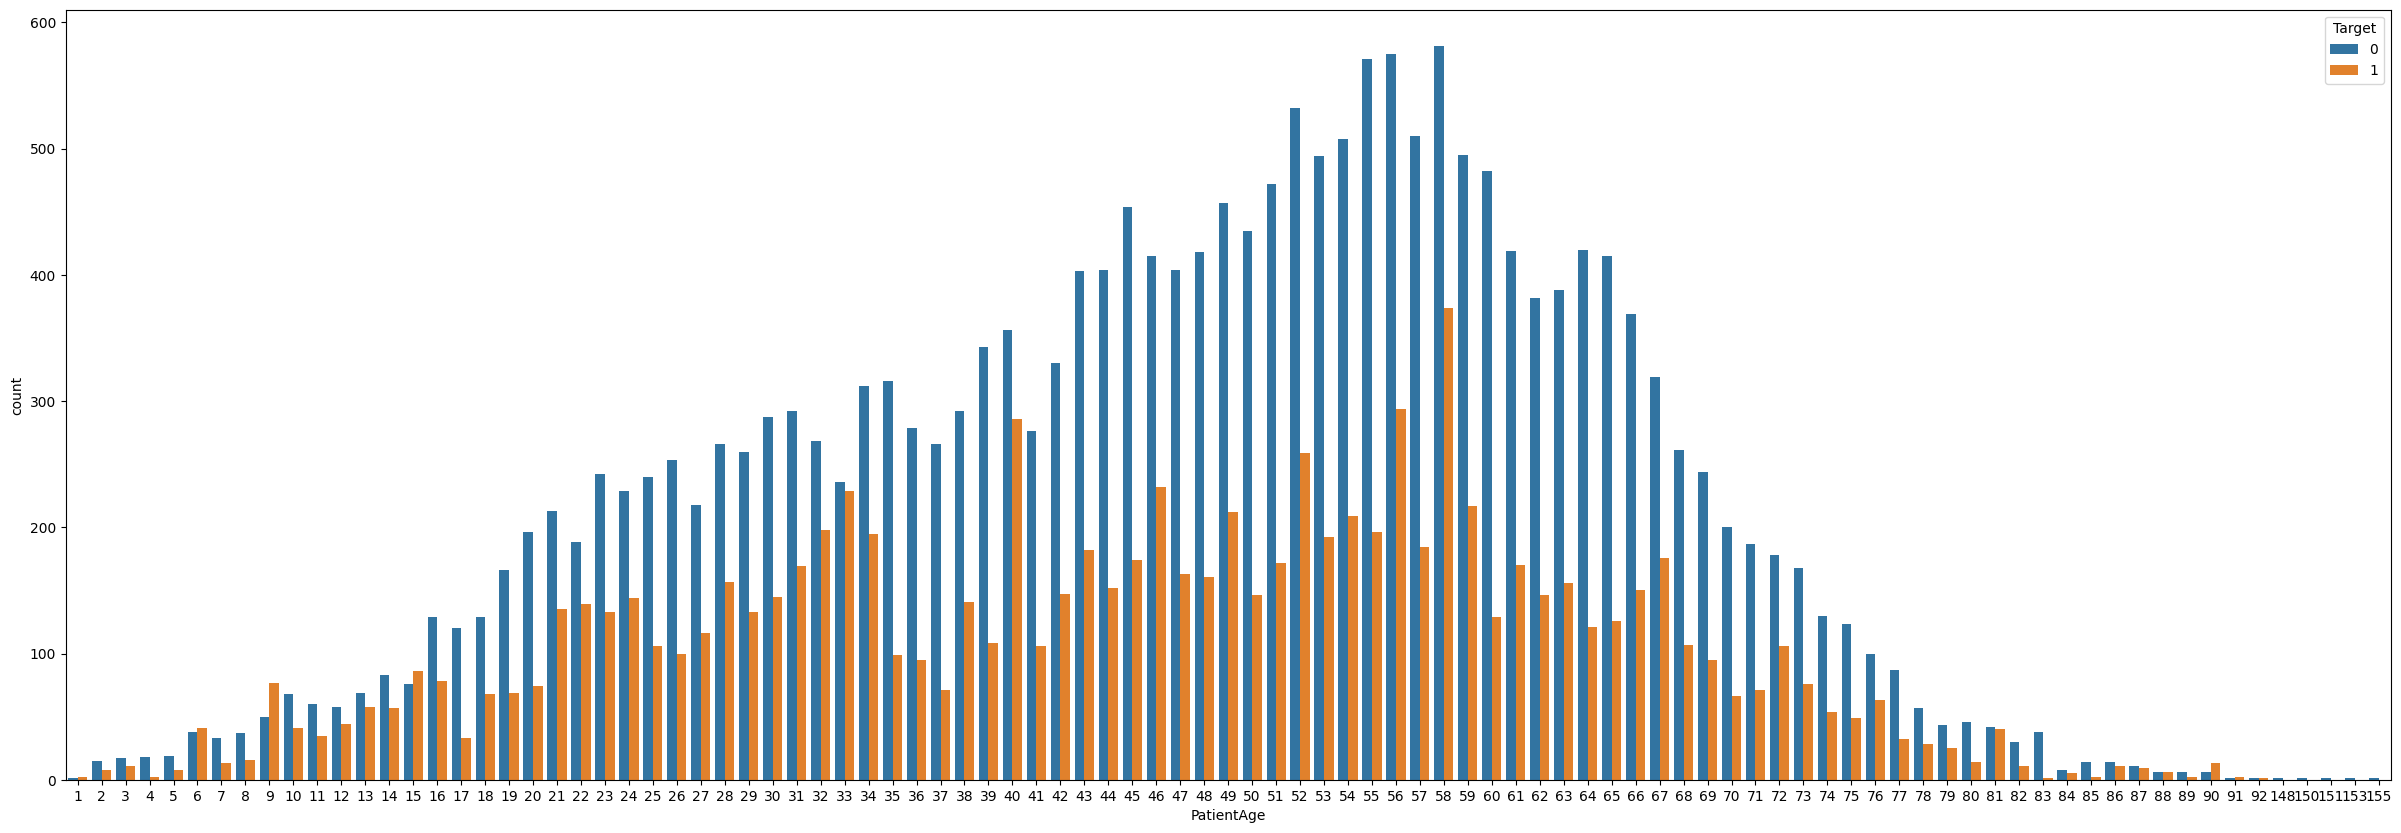

In [31]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'PatientAge', hue = 'Target', data = dicom_df)

<Axes: xlabel='PatientSex', ylabel='count'>

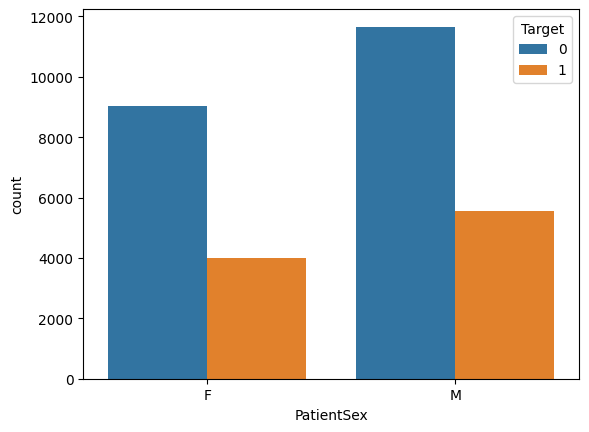

In [32]:
sns.countplot(x = 'PatientSex', hue = 'Target', data = dicom_df)

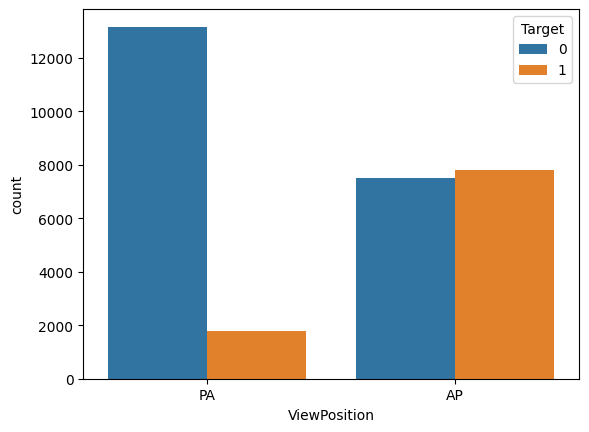

In [33]:
sns.countplot(x = 'ViewPosition', hue = 'Target', data = dicom_df);

In [34]:
dicom_df = dicom_df.drop('Target', axis=1)

In [35]:
dicom_df['PatientSex'].astype('category')
dicom_df['ViewPosition'].astype('category')
dicom_df['PatientSex'] = np.where(dicom_df["PatientSex"].str.contains("M"), 1, 0)
dicom_df['ViewPosition'] = np.where(dicom_df["ViewPosition"].str.contains("AP"), 1, 0)

In [36]:
dicom_df.head()

patientId      x      y  width  height  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   

                          class Modality  PatientAge  PatientSex  \
0  No Lung Opacity / Not Normal       CR          51           0   
1  No Lung Opacity / Not Normal       CR          48           0   
2  No Lung Opacity / Not Normal       CR          19           1   
3                        Normal       CR          28           1   
4                  Lung Opacity       CR          32           0   

  BodyPartExamined  ViewPosition  
0            CHEST             0  
1            CHEST             0  
2            CHEST             1  
3            CHEST             0  
4            CHEST             1

Checking the Corelation between variables

*   There is a strong correlation between width and height
*   Not much correlation is seen between other variables



In [37]:
dicom_df.corr()

x         y     width    height  PatientAge  PatientSex  \
x             1.000000  0.762055  0.795007  0.735061   -0.053137    0.009206   
y             0.762055  1.000000  0.811707  0.634177   -0.024397    0.028091   
width         0.795007  0.811707  1.000000  0.915537   -0.049035    0.037665   
height        0.735061  0.634177  0.915537  1.000000   -0.050976    0.029863   
PatientAge   -0.053137 -0.024397 -0.049035 -0.050976    1.000000   -0.009842   
PatientSex    0.009206  0.028091  0.037665  0.029863   -0.009842    1.000000   
ViewPosition  0.361044  0.353190  0.411144  0.423878   -0.060333    0.016904   

              ViewPosition  
x                 0.361044  
y                 0.353190  
width             0.411144  
height            0.423878  
PatientAge       -0.060333  
PatientSex        0.016904  
ViewPosition      1.000000

# **Visulaization of Dicom Images**

In [38]:
def show_dicom_image(data_df):
        img_data = list(data_df.T.to_dict().values())
        f, ax = plt.subplots(2,2, figsize=(16,18))
        for i,data_row in enumerate(img_data):
            pid = data_row['patientId']
            dcm_file = "/content/stage_2_train_images/%s.dcm" % pid
            dcm_data = pydicom.read_file(dcm_file)                    
            ax[i//2, i%2].imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
            ax[i//2, i%2].set_title('ID: {}\n Age: {} Sex: {}'.format(
                data_row['patientId'],dcm_data.PatientAge, dcm_data.PatientSex))

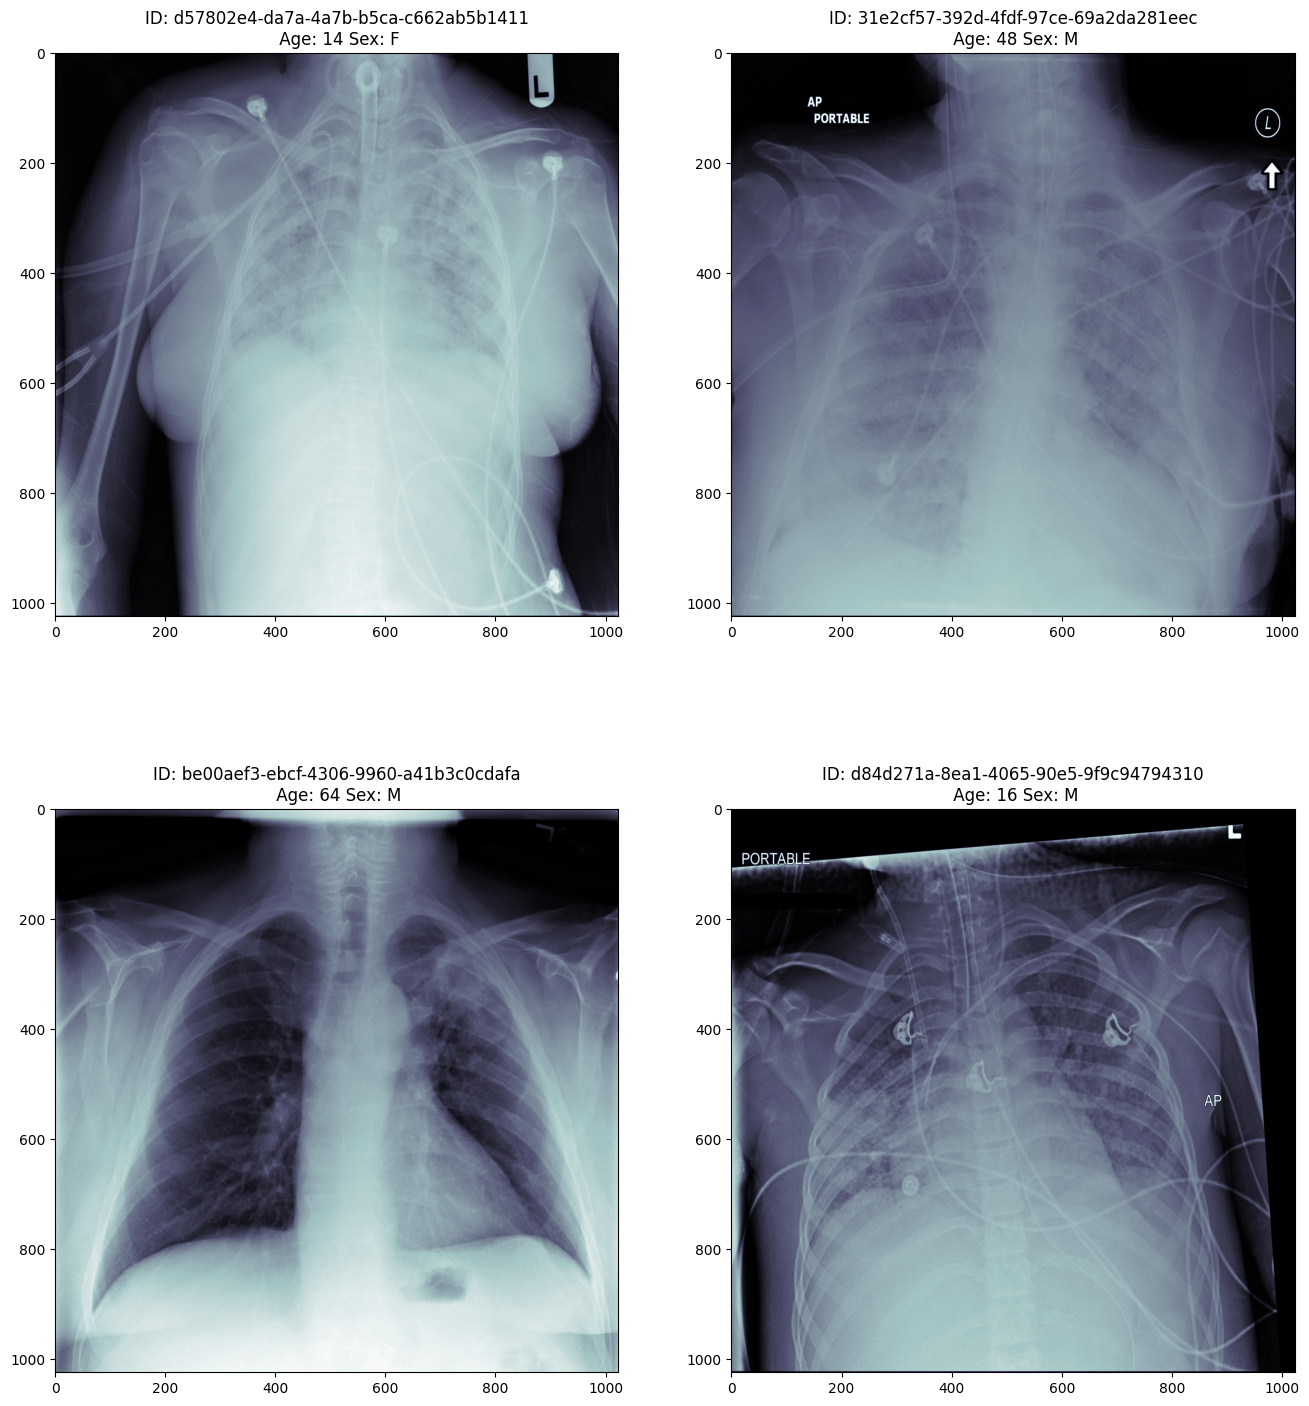

In [39]:
show_dicom_image(data[data['Target']==1].sample(n=4))

### **Visualization of dicom images of a patient with Pnuemonia, but have class as 'No Lung Opacity / Not Normal'**

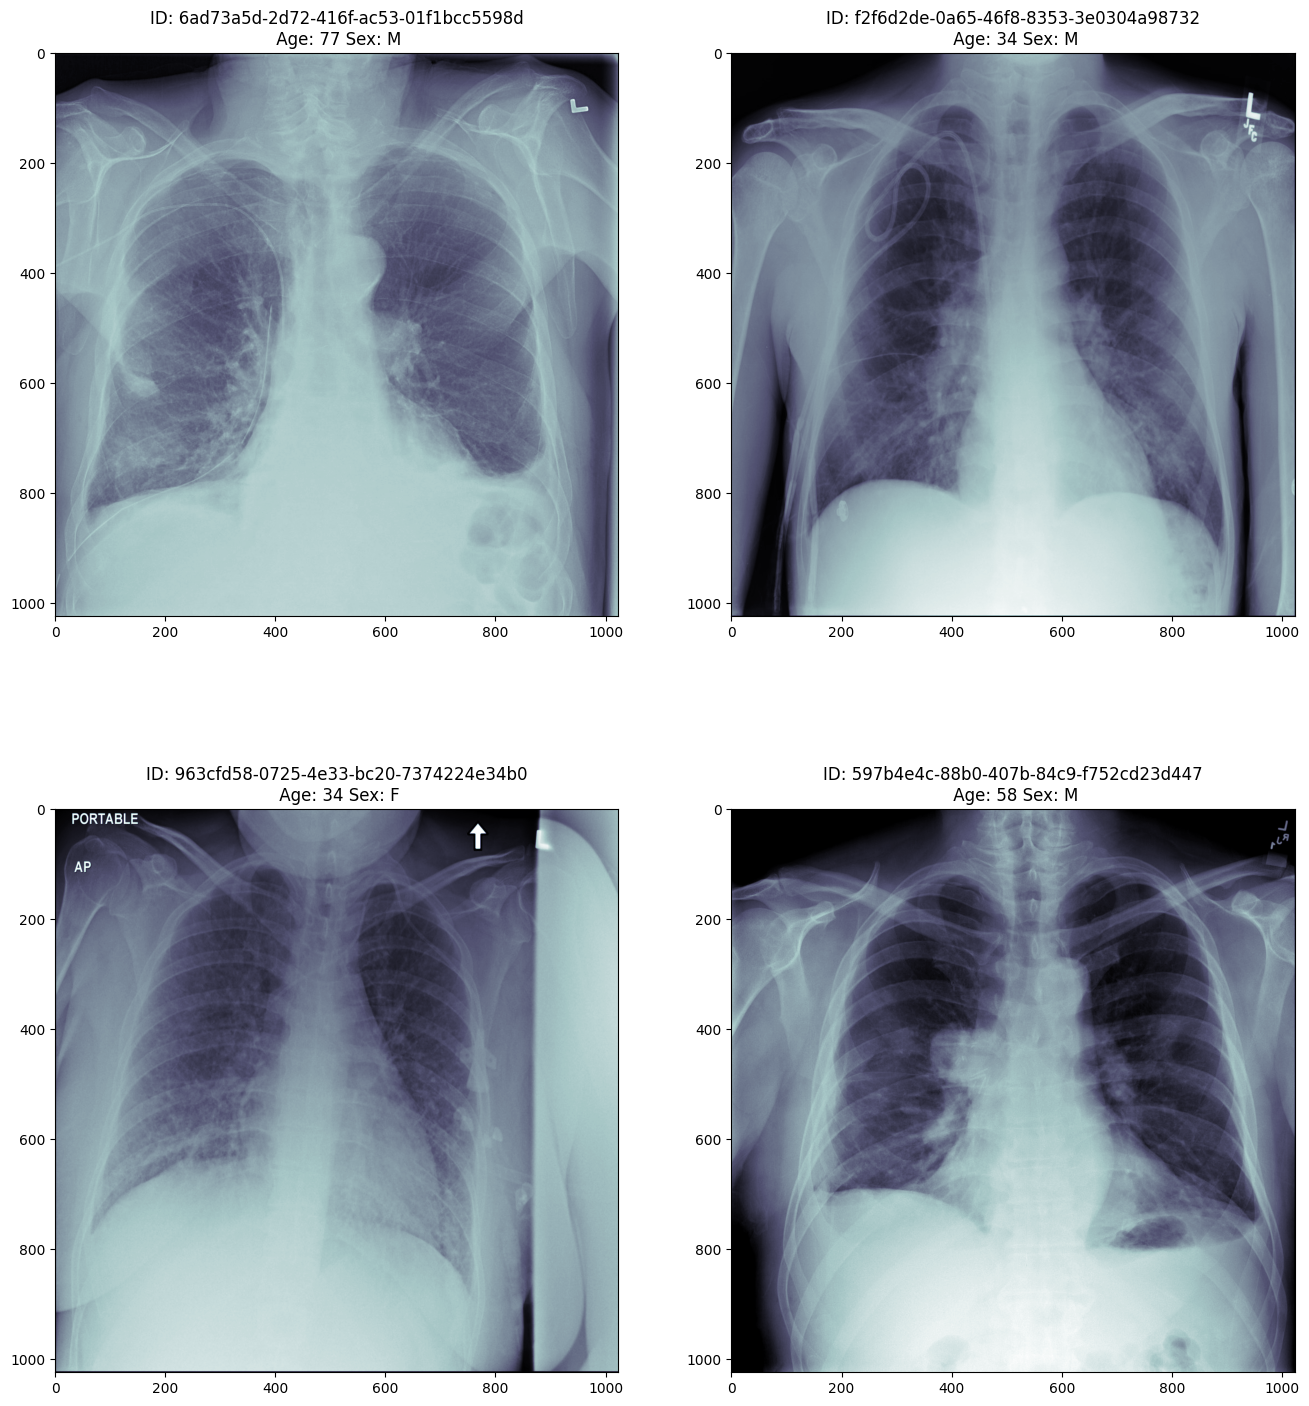

In [40]:
show_dicom_image(data[ (data['Target']==0) & (data['class']=='No Lung Opacity / Not Normal')].sample(n=4))

### **Visualization of dicom images of a patient with Pnuemonia, but have class as 'Normal'**

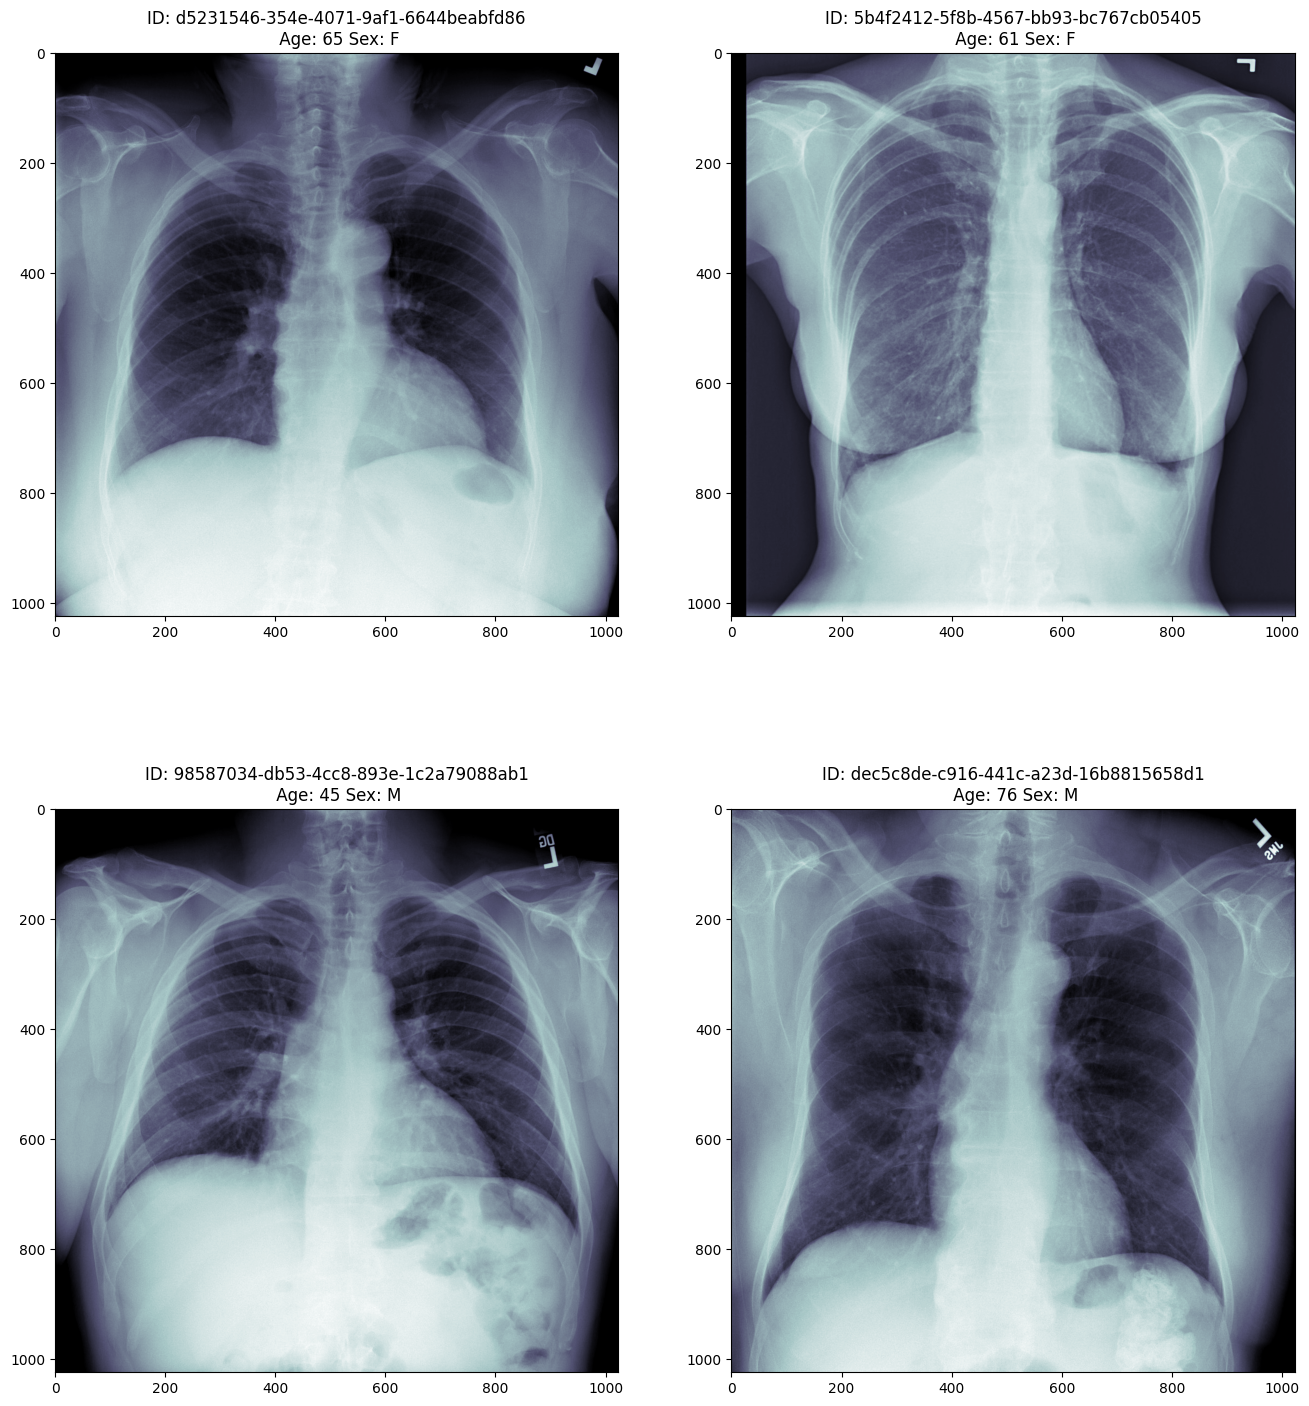

In [53]:
show_dicom_image(data[ (data['Target']==0) & (data['class']=='Normal')].sample(n=4))

# **MODEL BUILDING** 

Import Necessary libraries required for model building.

In [41]:
import os
import csv
import random
import pydicom
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow import keras

In [42]:
pneumonia_locations = {}
# load table
with open(os.path.join('stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

Load image filenames

In [43]:
# load and shuffle filenames
folder = 'stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 8000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 18684
n valid samples 8000



Creating a Data generator as dataset is very large.The generator takes in some filenames, batch_size and other parameters and outputs a random batch of numpy images and numpy masks.

In [44]:
class generator(keras.utils.Sequence):    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)


In [45]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    #print(y_true)
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
   
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [46]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

Building the model

In [47]:
model = create_network(input_size=IMAGE_SIZE, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam', loss=iou_bce_loss, metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.0001
    epochs = 3
    return lr*(np.cos(np.pi*x/epochs)+1.)/2


learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = 'stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=False, predict=False)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [48]:
EPOCHS=2
MULTI_PROCESSING = True 

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS, workers=4, use_multiprocessing=True)

<ipython-input-48-3a49034bb2c0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS, workers=4, use_multiprocessing=True)


Epoch 1/2
145/145 [==============================] - 2606s 17s/step - loss: 0.4895 - accuracy: 0.9565 - mean_iou: 0.6646 - val_loss: 0.4411 - val_accuracy: 0.9667 - val_mean_iou: 0.7269 - lr: 1.0000e-04
Epoch 2/2
145/145 [==============================] - 2541s 17s/step - loss: 0.4370 - accuracy: 0.9672 - mean_iou: 0.7217 - val_loss: 0.4449 - val_accuracy: 0.9583 - val_mean_iou: 0.6715 - lr: 7.5000e-05


**Plot Accuracy**

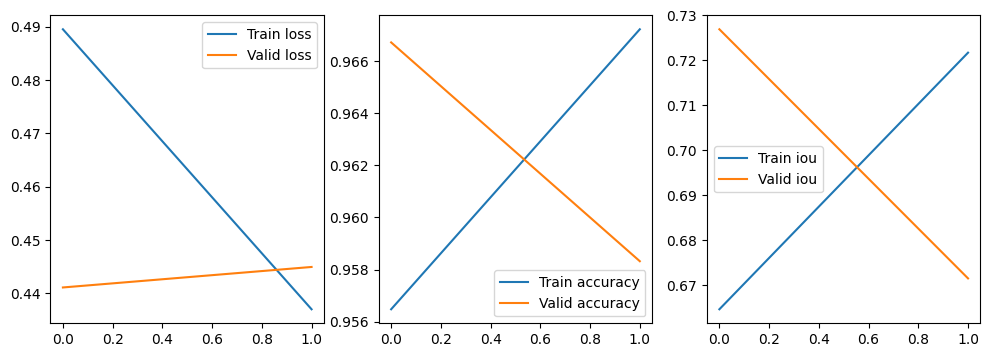

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

Predict test image

4/4 [==============================] - 1s 24ms/step


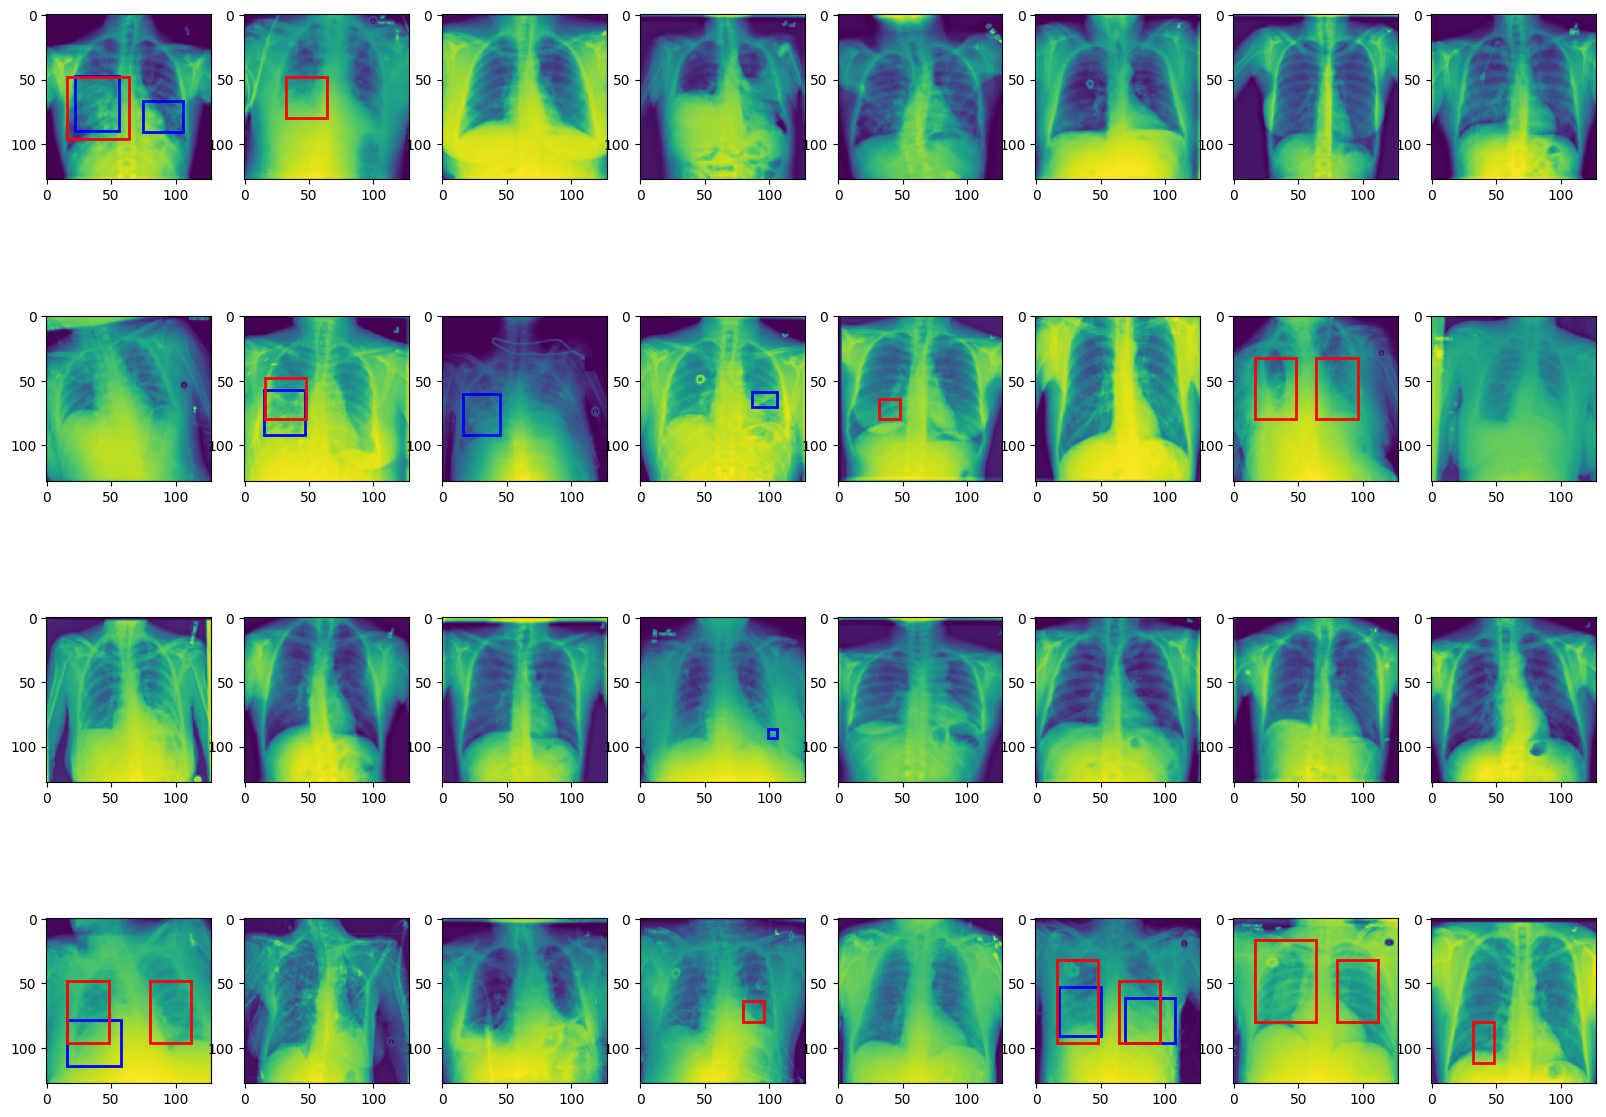

In [50]:
i=0
for imgs, msks in valid_gen:    
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))
    axarr = axarr.ravel()
    axidx = 0
    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        i=i+1
        #exit after 32 images
        if i>32:
            break
        # plot image
        axarr[axidx].imshow(img[:, :, 0])
        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='b',facecolor='none'))
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break

In [51]:
folder = 'stage_2_test_images'
test_filenames = os.listdir(folder)
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=100, image_size=128, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in tqdm(test_gen):
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission.csv')

n test samples: 3000


  0%|          | 0/30 [00:00<?, ?it/s]

4/4 [==============================] - 1s 145ms/step


  3%|▎         | 1/30 [00:17<08:13, 17.00s/it]

4/4 [==============================] - 0s 38ms/step


  7%|▋         | 2/30 [00:32<07:35, 16.28s/it]

4/4 [==============================] - 0s 38ms/step


 10%|█         | 3/30 [00:48<07:09, 15.90s/it]

4/4 [==============================] - 0s 38ms/step


 13%|█▎        | 4/30 [01:03<06:48, 15.73s/it]

4/4 [==============================] - 0s 38ms/step


 17%|█▋        | 5/30 [01:18<06:29, 15.57s/it]

4/4 [==============================] - 0s 40ms/step


 20%|██        | 6/30 [01:34<06:09, 15.41s/it]

4/4 [==============================] - 0s 40ms/step


 23%|██▎       | 7/30 [01:49<05:51, 15.30s/it]

4/4 [==============================] - 0s 38ms/step


 27%|██▋       | 8/30 [02:04<05:34, 15.20s/it]

4/4 [==============================] - 0s 38ms/step


 30%|███       | 9/30 [02:19<05:22, 15.38s/it]

4/4 [==============================] - 0s 38ms/step


 33%|███▎      | 10/30 [02:35<05:10, 15.50s/it]

4/4 [==============================] - 0s 38ms/step


 37%|███▋      | 11/30 [02:50<04:52, 15.38s/it]

4/4 [==============================] - 0s 38ms/step


 40%|████      | 12/30 [03:05<04:35, 15.30s/it]

4/4 [==============================] - 0s 38ms/step


 43%|████▎     | 13/30 [03:21<04:19, 15.24s/it]

4/4 [==============================] - 0s 38ms/step


 47%|████▋     | 14/30 [03:36<04:03, 15.24s/it]

4/4 [==============================] - 0s 39ms/step


 50%|█████     | 15/30 [03:51<03:47, 15.17s/it]

4/4 [==============================] - 0s 39ms/step


 53%|█████▎    | 16/30 [04:06<03:30, 15.04s/it]

4/4 [==============================] - 0s 38ms/step


 57%|█████▋    | 17/30 [04:20<03:14, 14.97s/it]

4/4 [==============================] - 0s 39ms/step


 60%|██████    | 18/30 [04:35<02:59, 14.98s/it]

4/4 [==============================] - 0s 38ms/step


 63%|██████▎   | 19/30 [04:51<02:47, 15.25s/it]

4/4 [==============================] - 0s 39ms/step


 67%|██████▋   | 20/30 [05:07<02:33, 15.36s/it]

4/4 [==============================] - 0s 39ms/step


 70%|███████   | 21/30 [05:22<02:17, 15.25s/it]

4/4 [==============================] - 0s 39ms/step


 73%|███████▎  | 22/30 [05:37<02:01, 15.19s/it]

4/4 [==============================] - 0s 38ms/step


 77%|███████▋  | 23/30 [05:52<01:46, 15.15s/it]

4/4 [==============================] - 0s 39ms/step


 80%|████████  | 24/30 [06:07<01:30, 15.12s/it]

4/4 [==============================] - 0s 39ms/step


 83%|████████▎ | 25/30 [06:22<01:15, 15.04s/it]

4/4 [==============================] - 0s 38ms/step


 87%|████████▋ | 26/30 [06:37<00:59, 14.95s/it]

4/4 [==============================] - 0s 38ms/step


 90%|█████████ | 27/30 [06:51<00:44, 14.91s/it]

4/4 [==============================] - 0s 38ms/step


 93%|█████████▎| 28/30 [07:06<00:29, 14.84s/it]

4/4 [==============================] - 0s 38ms/step


 97%|█████████▋| 29/30 [07:21<00:14, 14.99s/it]

4/4 [==============================] - 0s 39ms/step


 97%|█████████▋| 29/30 [07:37<00:15, 15.78s/it]


In [52]:
# load and shuffle filenames
#folder = 'stage_2_test_images'
#test_filenames = os.listdir(folder)
#print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True

folder = 'stage_2_test_images'
#train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=True, predict=False)
#test_gen = generator(folder, valid_filenames, None, batch_size=32, image_size=IMAGE_SIZE, shuffle=False, predict=True)
test_gen = generator(folder, test_filenames, None, batch_size=32, image_size=128, shuffle=False, predict=True)
# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
       # print(filename)
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break
        
print("Done predicting...")
        
# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission.csv')

1/1 [==============================] - 1s 643ms/step
Done predicting...
